# Description:

This project intends to bring attention of all the trainers and sports analysts who want to find out insights from Olympics data which will help them know about the trends/patterns that have existed and evolved over the years.

Individual countries can also find about their history in the games and how that information can help them improving their focus on participation and plan strategies around it. 


# Questions:

-	Has the gender difference remained consistent throughout the history of Olympics? 
-	Did different seasons of Olympics have any impact on gender ratio and on participation?
-	Does the Sport with most participation gets a greater number of medals?
-	Has the number of games increased with the passing of each year?


# Hypothesis:

-	Male ratio to female would reduce but not much.
-	Seasons have no impact on gender ratio, but participation reduces in winters.
-	More participation in ‘X’ sport brings more medals in that sport.
-	Number of gaming events have increased.


## Importing the libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as sql
from mysql.connector import Error
import csv

## Uploading and Cleaning the Data

In [14]:
df1 = pd.read_csv("C:\\Users\\Common Machine\\OneDrive\\Desktop\\Capstone\\athlete_events.csv")

df2 = pd.read_csv("C:\\Users\\Common Machine\\OneDrive\\Desktop\\Capstone\\noc_regions.csv")

In [15]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [17]:
#Checking the Data type of each column and looking out for null values
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

In [18]:
# Clearing out the Null Values (Cleaning)
ath_f = df1.fillna({
   'Age':0, 'Height':0, 'Weight':0, 'Medal':'None'
})
noc_f = df2.region.fillna(df2.notes, inplace=True)
noc_f = df2.drop('notes', axis=1)

In [19]:
ath_f.info()
noc_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

## Connecting and importing data to MySQL

In [20]:
try:
    conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table')
    
    if conn.is_connected():
        c = conn.cursor()
        c.execute("CREATE DATABASE SportsStats")
    
except Error as e:
    print("Error while connecting to MySQL:", e)


Error while connecting to MySQL: 1007 (HY000): Can't create database 'sportsstats'; database exists


In [11]:
try:
    conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 
    
    if conn.is_connected():
        c = conn.cursor()
        c.execute("DROP TABLE IF EXISTS AthleteEvent")
        c.execute("DROP TABLE IF EXISTS NOC_Region")
        
        c.execute('CREATE TABLE AthleteEvent(ID int, Name VARCHAR(255), Sex VARCHAR(20), Age float, Height float,\
        Weight float, Team VARCHAR(255), NOC VARCHAR(255), Games VARCHAR(255), Year int, Season VARCHAR(20),\
        City VARCHAR(255), Sport VARCHAR(255), Event VARCHAR(255), Medal VARCHAR(255))')
        c.execute('CREATE TABLE NOC_Region(NOC VARCHAR(10), Region VARCHAR(255))')
        
        for i, row in ath_f.iterrows():
            val = "INSERT INTO sportsstats.AthleteEvent VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            c.execute(val, tuple(row))
            conn.commit()
            
        for i, row in noc_f.iterrows():
            val = "INSERT INTO sportsstats.NOC_Region VALUES(%s,%s)"
            c.execute(val, tuple(row))
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL:", e)        

# Data Analysis

## Gender based Analysis

In [41]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('''SELECT year, season, male, female, total, ROUND((male/female), 2) AS m_to_f
          FROM (SELECT DISTINCT a.year,
                                a.season,
                                SUM(CASE
                                        WHEN a.sex = "M" THEN 1 ELSE 0
                                    END) AS male,
                                SUM(CASE
                                        WHEN a.sex = "F" THEN 1 ELSE 0
                                   END) AS female,
                                COUNT(a.sex) AS total
                                FROM athleteevent a
                                INNER JOIN noc_region n ON a.NOC = n.NOC
                                GROUP BY a.year
                                ORDER BY a.year ASC
                                ) AS table1''')
Result = c.fetchall()

In [172]:
gender = pd.DataFrame(Result, columns = ['Year', 'Season', 'Male', 'Female', 'Total', 'Male_to_Female_Ratio'])

In [173]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  35 non-null     int64 
 1   Season                35 non-null     object
 2   Male                  35 non-null     object
 3   Female                35 non-null     object
 4   Total                 35 non-null     int64 
 5   Male_to_Female_Ratio  34 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


In [174]:
gender = gender.astype({'Male':np.int64, 'Female':np.int64, 'Male_to_Female_Ratio':float})
gender.info()
gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  35 non-null     int64  
 1   Season                35 non-null     object 
 2   Male                  35 non-null     int64  
 3   Female                35 non-null     int64  
 4   Total                 35 non-null     int64  
 5   Male_to_Female_Ratio  34 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ KB


,Year,Season,Male,Female,Total,Male_to_Female_Ratio
0,1896,Summer,380,0,380,NaN
1,1900,Summer,1903,33,1936,57.67
2,1904,Summer,1285,16,1301,80.31
3,1906,Summer,1722,11,1733,156.55
4,1908,Summer,3054,47,3101,64.98
5,1912,Summer,3953,87,4040,45.44
6,1920,Summer,4158,134,4292,31.03
7,1924,Summer,5432,261,5693,20.81
8,1928,Summer,5137,437,5574,11.76
9,1932,Summer,2952,369,3321,8.00


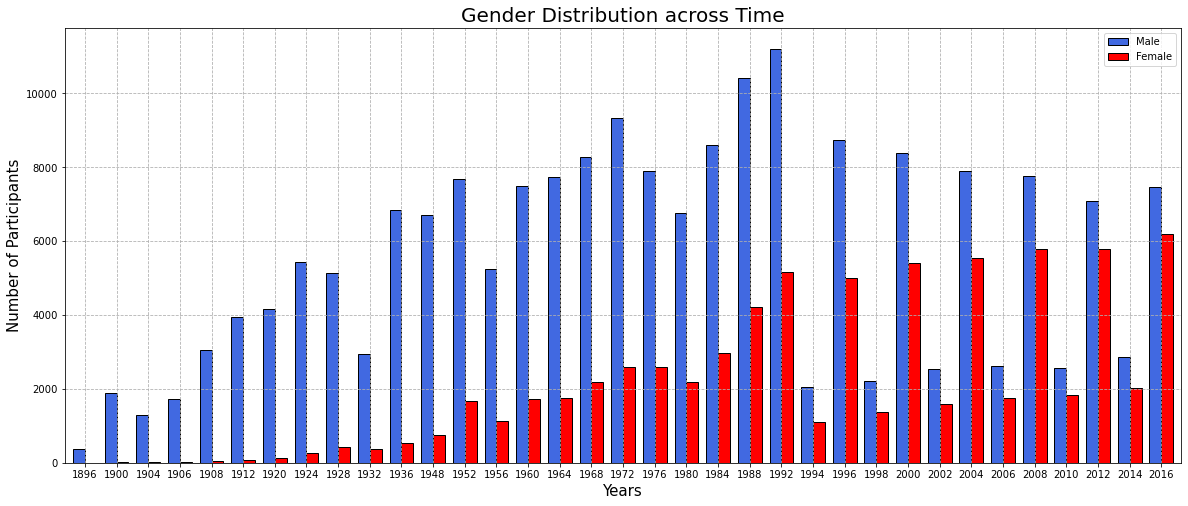

In [329]:
Gender_plot = gender.plot.bar(x = 'Year', y = ['Male','Female'], figsize = [20,8], rot = 0, width = 0.75, color = {'Male':'royalblue', 'Female':'red'}, edgecolor = 'black')
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of Participants", fontsize = 15)
plt.title("Gender Distribution across Time", fontsize = 20)
plt.grid(linestyle = '--')


#### This graph clearly shows that with gradual increase in time, participation of female players has increased many folds from the inception of the games. 

Text(0.5, 1.0, 'Seasons')

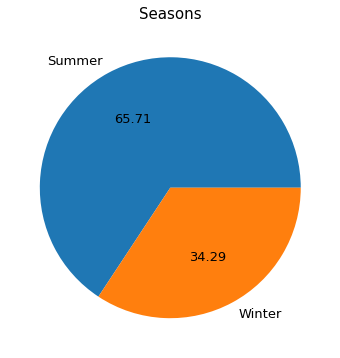

In [190]:
Gender_plot2 = gender.groupby('Season')['Season'].count().plot.pie(autopct = '%.2f', figsize = [6,6], textprops = {'fontsize':13})
plt.ylabel("")
plt.title("Seasons", fontsize = 15)

In [240]:
gender2 = gender.drop(gender.index[0:12])
gender2

,Year,Season,Male,Female,Total,Male_to_Female_Ratio
12,1952,Summer,7671,1680,9351,4.57
13,1956,Winter,5246,1136,6382,4.62
14,1960,Winter,7500,1730,9230,4.34
15,1964,Winter,7728,1752,9480,4.41
16,1968,Summer,8280,2193,10473,3.78
17,1972,Summer,9342,2605,11947,3.59
18,1976,Summer,7893,2605,10498,3.03
19,1980,Winter,6751,2186,8937,3.09
20,1984,Winter,8591,2983,11574,2.88
21,1988,Winter,10427,4222,14649,2.47


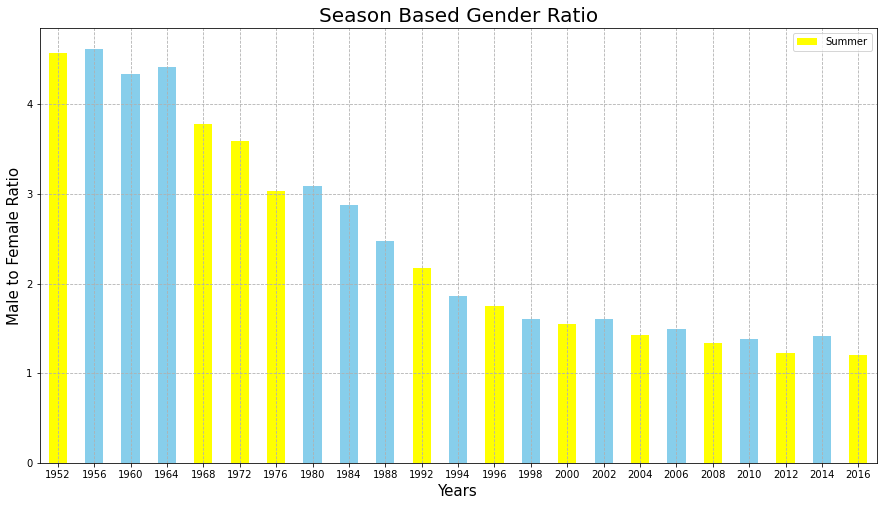

In [386]:
colors = gender2.Season
col = []
for i in colors:
    if i=='Summer':
        col.append('yellow')
    else:
        col.append('skyblue')
    
Season_ratio = gender2.plot.bar(x = 'Year', y = 'Male_to_Female_Ratio', figsize = [15,8], rot = 0, color = col)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Male to Female Ratio", fontsize = 15)
plt.title("Season Based Gender Ratio", fontsize = 20)
plt.grid(linestyle = '--')
plt.legend(colors)


####  The early few years have been removed from this data to get better understanding on how the ratio looks like, with the addtion of different seasons. 

#### This graph shows that Male to Female ratio has been reducing with every successful passing games. The winter games (highlighted in Blue bars) have slightly higher gender ratio when compared to summer games. This concludes that seasons does have some impact on the gender ratio.

## Favourable Sport

In [388]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('SELECT region, sport, MAX(s_count) AS participations\
                FROM (SELECT DISTINCT n.region, a.sport, COUNT(a.sport) AS s_count\
                            FROM athleteevent a\
                        INNER JOIN noc_region n ON a.noc = n.noc\
                        GROUP BY n.region, a.sport\
                        ORDER BY n.region, s_count DESC\
                      ) AS table1\
            GROUP BY region')
Result1 = c.fetchall()

In [399]:
max_participated_sport_per_country = pd.DataFrame(Result1, columns = ['Country', 'Participation Sport','Participation Count'])
max_participated_sport_per_country

,Country,Participation Sport,Participation Count
0,Afghanistan,Wrestling,42
1,Albania,Weightlifting,17
2,Algeria,Athletics,139
3,American Samoa,Athletics,11
4,Andorra,Alpine Skiing,105
...,...,...,...
203,"Virgin Islands, British",Athletics,31
204,"Virgin Islands, US",Swimming,81
205,Yemen,Athletics,24
206,Zambia,Athletics,70


In [401]:
c = conn.cursor(buffered=True)
c.execute('SELECT region, sport, MAX(m_count) AS medals_won\
                FROM (SELECT DISTINCT n.region, a.sport, COUNT(a.medal) AS m_count\
                            FROM athleteevent a\
                        INNER JOIN noc_region n ON a.noc = n.noc\
                        WHERE a.medal IN ("Gold", "Silver", "Bronze")\
                        GROUP BY n.region, a.medal\
                        ORDER BY n.region, m_count DESC\
                      ) AS table2\
            GROUP BY region')
Result2 = c.fetchall()

In [402]:
max_medals_won_sports_per_country = pd.DataFrame(Result2, columns = ['Country', 'Winning Sport','Medals Won'])
max_medals_won_sports_per_country

,Country,Winning Sport,Medals Won
0,Afghanistan,Taekwondo,2
1,Algeria,Boxing,8
2,Argentina,Hockey,92
3,Armenia,Wrestling,9
4,Australia,Hockey,522
...,...,...,...
131,Venezuela,Boxing,10
132,Vietnam,Weightlifting,3
133,"Virgin Islands, US",Sailing,1
134,Zambia,Athletics,1


In [495]:
outcome1 = pd.merge(max_participated_sport_per_country, max_medals_won_sports_per_country, on = 'Country', how = 'outer')
outcome1 = outcome1.set_index(['Country'])

In [496]:
outcome1 = outcome1.fillna({
   'Medals Won':0, 'Winning Sport':'None'
})
outcome1['Medals Won'] = outcome1['Medals Won'].astype(int)

In [497]:
# Table where all the countries with most participated sport and most medals won can be viewed. 
def p2w_relation (row):
    if row['Participation Sport'] == row['Winning Sport']:
        return 'True'
    else:
        return 'False'
    
outcome1['Partcipation_Winning_Relation'] = outcome1.apply(lambda row: p2w_relation (row), axis=1)
outcome1.head(50)

,Participation Sport,Participation Count,Winning Sport,Medals Won,Partcipation_Winning_Relation
Country,,,,,
Afghanistan,Wrestling,42,Taekwondo,2,False
Albania,Weightlifting,17,None,0,False
Algeria,Athletics,139,Boxing,8,False
American Samoa,Athletics,11,None,0,False
Andorra,Alpine Skiing,105,None,0,False
Angola,Handball,84,None,0,False
Antigua,Athletics,96,None,0,False
Argentina,Hockey,286,Hockey,92,True
Armenia,Wrestling,47,Wrestling,9,True


In [466]:
outcome1.Partcipation_Winning_Relation.value_counts()

False    167
True      41
Name: Partcipation_Winning_Relation, dtype: int64

#### This table explores the sport in which a country had their most participation versus the country with the sport which won most medals. And if there is any correlation between these parameters.

#### We see that for most of the sports in Participation Sport column differs to what one can see in Winning Sport column. From last parameter of the dataframe, Participation Winning Relation, we can infer that majority of the countries has no correlation between the sport with maximum participation and the sport with most medals.  


## Medals & Participation

### Medals per Country

In [499]:
conn = sql.connect(host = 'localhost', user = 'root', password = 'The28Table', database = 'sportsstats') 

c = conn.cursor(buffered=True)
c.execute('SELECT year,\
                SUM(CASE\
                          WHEN medal IN ("Gold", "Silver", "Bronze") THEN 1 ELSE 0\
                    END) AS total_medals,\
                COUNT(DISTINCT sport) AS sports_categories,\
                COUNT(event) AS participation\
            FROM athleteevent\
            GROUP BY year\
            ORDER BY year')
Result4 = c.fetchall()

In [502]:
participation_event_medal = pd.DataFrame(Result4, columns = ["Year", "Medals", "No. Sports Category", "Participation"])
participation_event_medal['Medals'] = participation_event_medal['Medals'].astype(np.int64)
participation_event_medal = participation_event_medal.set_index(['Year'])
participation_event_medal

,Medals,No. Sports Category,Participation
Year,,,
1896,143,9,380
1900,604,20,1936
1904,486,18,1301
1906,458,13,1733
1908,831,24,3101
1912,941,17,4040
1920,1308,25,4292
1924,962,30,5693
1928,823,25,5574


#### This analysis will draw out the medals won on yearly basis with number of participation based on Event/games organized under each category of sport.

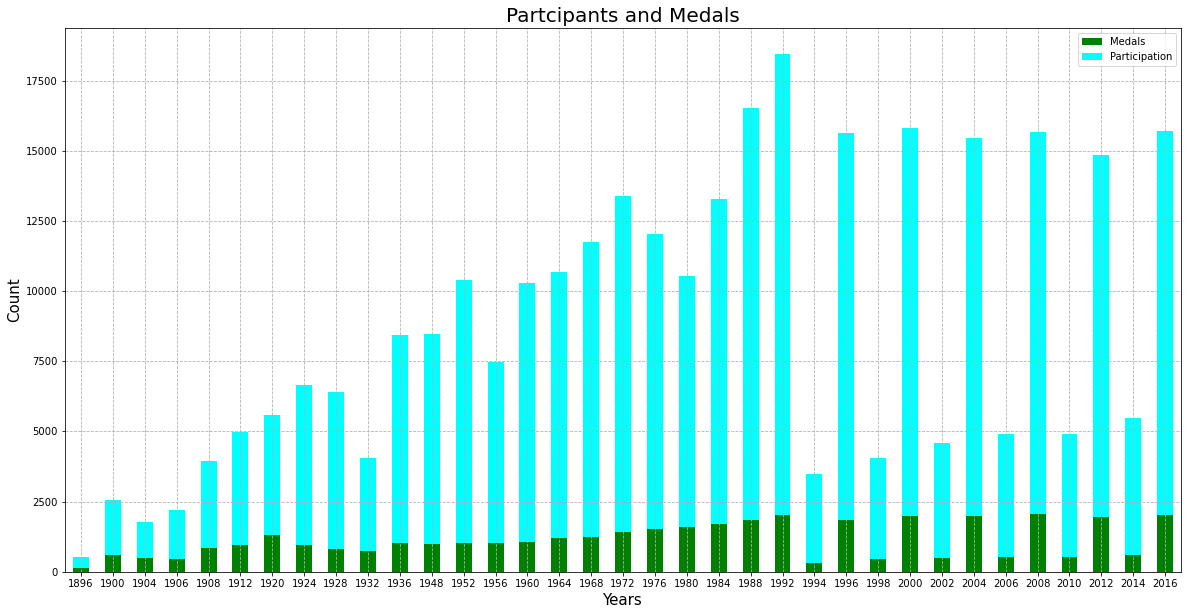

In [504]:
participation_event_medal[['Medals','Participation']].plot.bar(stacked = True, figsize = (20,10), rot = 0, color = ["green", "cyan"])
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Partcipants and Medals", fontsize = 20)
plt.grid(linestyle = '--')


#### This graph represents how the participation has varied through times. There has been a gradual increase in participation of Olympics since the inception of the games, and in the last three decades, we observed the consistency in the number of participants.


## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?
* Male to Female ratio was expected to be on the higher end, which in the early years was the case, however, the data that has been extracted, tells a different story. The ratio has reduced drastically since last 3 decades. 
* Comparison between the most participated sport vs sport with the most medals was unexpected. They are not much related to each other as per the belief, and based on the outcome which was derived by checking the count of different values in Partcipation_Winning_Relation, it shows that 1 in 4 countries only had that direct correlation.   


In [471]:
# To check the mean of Male_to_Female_Ratio of the last three decades.
gender2[10:].describe()

,Year,Male,Female,Total,Male_to_Female_Ratio
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2004.000000,5646.076923,3738.153846,9384.230769,1.539231
std,7.788881,3211.205756,2076.378893,5177.388952,0.268218
min,1992.000000,2055.000000,1105.000000,3160.000000,1.200000
25%,1998.000000,2555.000000,1757.000000,4382.000000,1.380000
50%,2004.000000,7093.000000,4998.000000,12884.000000,1.490000
75%,2010.000000,7890.000000,5531.000000,13656.000000,1.600000
max,2016.000000,11212.000000,6203.000000,16376.000000,2.170000


In [487]:
# Information to gauge participation based on Seasons
gender.groupby(['Season']).Total.describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Summer,23.0,8085.478261,4994.236431,380.0,3680.50,7479.0,13152.5,16376.0
Winter,12.0,7066.750000,3659.524538,3160.0,4313.75,5636.5,9292.5,14649.0


## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

-	Gender ratio has drastically reduced, which as per the hypothesis made earlier, got proven wrong. It’s the quite opposite of what was initially thought of. From past three decades, the ration, on average has been 1.53.
-	‘Season Based Gender Ratio’ table helps us interpret that be it any season, summer or winter, the gender-based participation is not highly impacted. In all we have seen that the gap between the gender ratio has been decreasing consistently. 
The above calculation helps us know that summer vs winter participation has had a difference of about 1000 participants on average. Summer has more count, but not a huge difference on a larger scale.
-	Theory of more participation being directly proportion to more medals, in case of same sport, has been debunked. The ‘outcome1’ table confirms that more participation in ‘X’ sport does not guarantee more medals in that sport. Out of total of 208 countries, about ¼ were only able to satisfy this hypothesis making it not at concrete path for the intended outcome.
- In table 'participation_event_medal', the category of sports have increased with time, but in the recent decades, the winter sports category has reduced in numbers.


## What additional questions are you seeking to answer?

-	To further find different relationships between events of sports, medals and participation.
-   In Winter Olympics, if the number of participants reduces with regards to their country, or the country withdraws their participation entirely.